In [16]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist #Load dataset
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data() #Separate the dataset in tuples for training and test.

print(f"El shape de las imagenes de entrenamiento es: {train_images.shape}")
print(f"El shape de las salidas de entrenamiento es: {train_labels.shape}")
print(f"El shape de las imagenes de prueba es: {test_images.shape}")
print(f"El shape de las salidas de prueba es: {test_labels.shape}")

#Preprocessing ...
class_names = ['T-Shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag',' Ankle Boot']
train_images = train_images / 255.0
test_images = test_images / 255.0




El shape de las imagenes de entrenamiento es: (60000, 28, 28)
El shape de las salidas de entrenamiento es: (60000,)
El shape de las imagenes de prueba es: (10000, 28, 28)
El shape de las salidas de prueba es: (10000,)


In [17]:

    model = keras.Sequential([#Keras.Sequential Indica la forma de la red neuronal, la info va desde el principio hasta el final de la red neuronal, no es recurrente, ni convolucional, ni nada de eso... 
        keras.layers.Flatten(input_shape=(28,28)),#Esta capa lo que hace es tomar los 28x28 pixeles y convertirlos en una columna de 784 datos para este caso. Flatten = Aplanar
        keras.layers.Dense(128,activation='relu'),    #----En estos 3 renglones se defiene las capas de la red 
        keras.layers.Dense(10,activation='softmax') # softmax = sigmoid
    ])
   


In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4966 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3741 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2571 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2477 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [19]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1)
print(f"Test accuracy = {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8812
Test accuracy = 0.8812000155448914


In [61]:
predictions = model.predict(test_images)
num_pred = 2000
print(predictions[num_pred])
index = np.argmax(predictions[num_pred])
print(index)

313/313 [==============================] - 1s 2ms/step
[4.5231790e-08 1.3191540e-10 1.7537008e-08 1.0413535e-10 8.6134042e-07
 8.1575732e-11 1.7580670e-09 2.8107818e-09 9.9999905e-01 2.0907987e-11]
8


This is the neural network input:


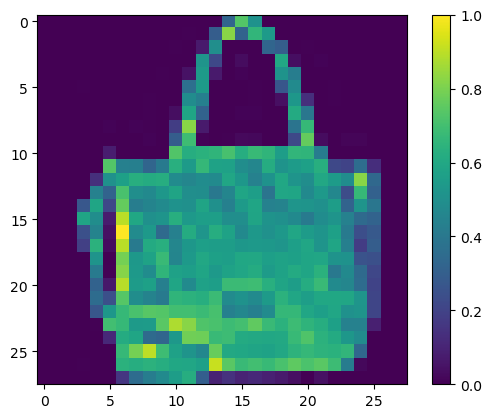

 The neural network classify it as a: Bag


In [62]:

print("This is the neural network input:")
plt.figure()
plt.imshow(test_images[num_pred])
plt.colorbar()
plt.grid(False)
plt.show()

print(f" The neural network classify it as a: {class_names[index]}")